# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nfvalenn","key":"a3a0ff08ac9168a2e59ab40ed38acf5b"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d osmi/mental-health-in-tech-survey
!unzip mental-health-in-tech-survey.zip

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey
License(s): CC-BY-SA-4.0
  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 95.1MB/s]
Archive:  mental-health-in-tech-survey.zip
  inflating: survey.csv              


In [5]:
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [8]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [9]:
print("Jumlah data duplikasi :", df.duplicated().sum())

Jumlah data duplikasi : 0


In [10]:
df['treatment'].value_counts(normalize=True)

,proportion
treatment,
Yes,0.505957
No,0.494043


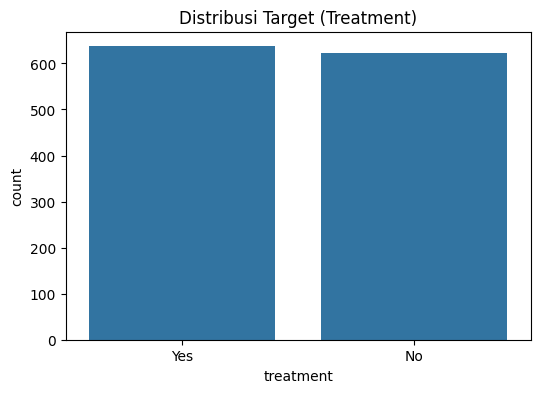

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='treatment', data=df)
plt.title('Distribusi Target (Treatment)')
plt.show()

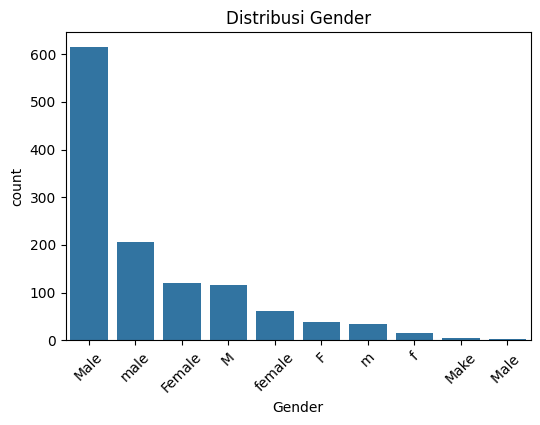

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, order=df['Gender'].value_counts().iloc[:10].index)
plt.title('Distribusi Gender')
plt.xticks(rotation=45)
plt.show()

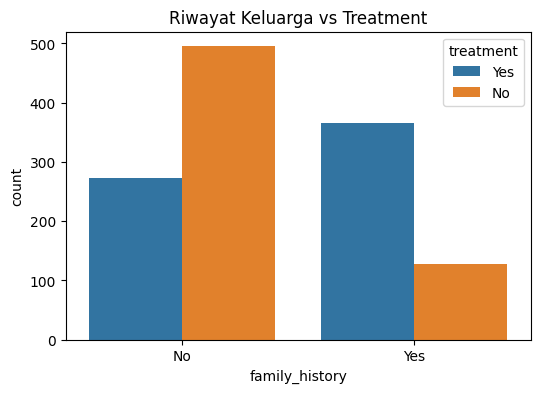

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title('Riwayat Keluarga vs Treatment')
plt.show()

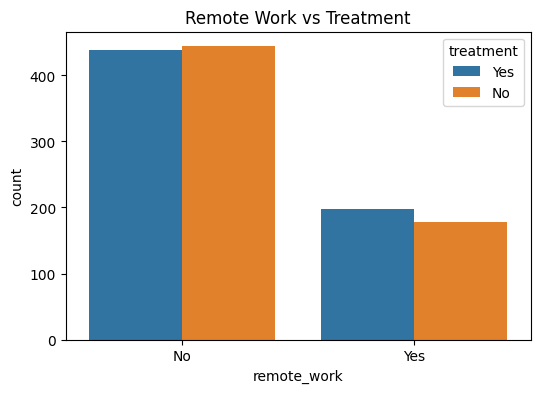

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='remote_work', hue='treatment', data=df)
plt.title('Remote Work vs Treatment')
plt.show()

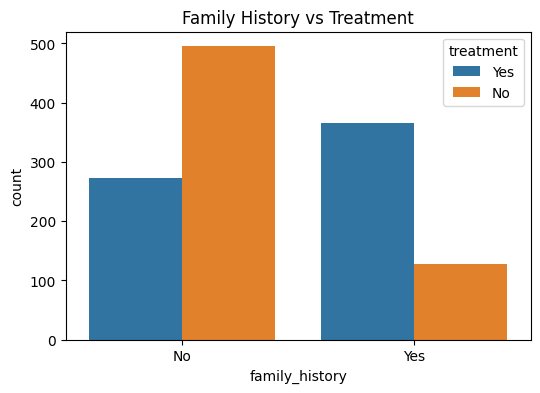

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title('Family History vs Treatment')
plt.show()

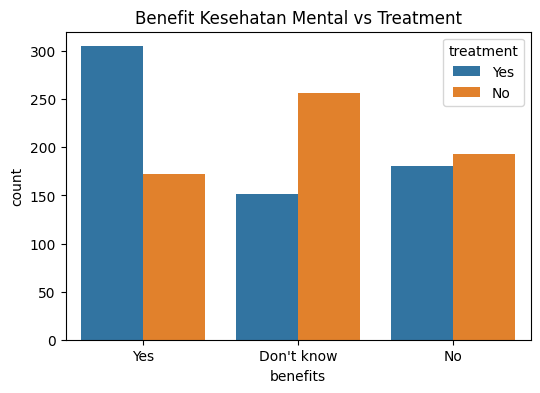

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='benefits', hue='treatment', data=df)
plt.title('Benefit Kesehatan Mental vs Treatment')
plt.show()

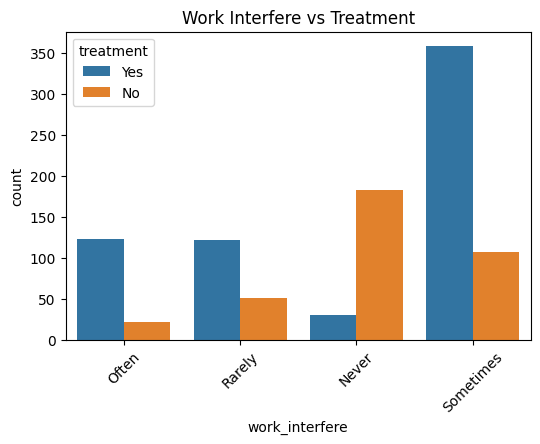

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='work_interfere', hue='treatment', data=df)
plt.title('Work Interfere vs Treatment')
plt.xticks(rotation=45)
plt.show()

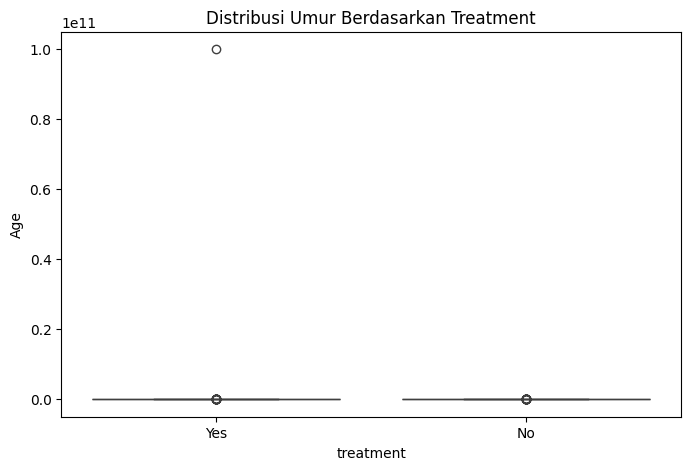

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='treatment', y='Age', data=df)
plt.title('Distribusi Umur Berdasarkan Treatment')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
df_clean = df[(df['Age'] >= 18) & (df['Age'] <= 65)].copy()

drop_cols = ['comments', 'state', 'Timestamp', 'Country']
df_clean = df_clean.drop(columns=[col for col in drop_cols if col in df_clean.columns])

In [24]:
categorical_columns = df_clean.select_dtypes(include=['object', 'category']).columns

In [25]:
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

In [26]:
df_clean = df_clean.copy()

for col in categorical_columns:
    df_clean.loc[:, col] = df_clean[col].fillna('Unknown')

for col in numerical_columns:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].median())

In [27]:
le = LabelEncoder()

df_clean = df_clean.copy()

for col in categorical_columns:
    df_clean.loc[:, col] = le.fit_transform(df_clean[col])

In [28]:
scaler = StandardScaler()
df.loc[:, 'Age'] = scaler.fit_transform(df[['Age']])

<ipython-input-28-2645021563>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.02819419 -0.02819419 -0.02819419 ... -0.02819419 -0.02819419
 -0.0281942 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Age'] = scaler.fit_transform(df[['Age']])


In [29]:
print("Dataset shape:", df_clean.shape)
print("Missing values:\n", df_clean.isnull().sum())
print("\nData types:\n", df_clean.dtypes)
print("\nUnique values per column:\n", df_clean.nunique())
print("\nSample data:")
display(df_clean.head())

Dataset shape: (1250, 23)
Missing values:
 Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

Data types:
 Age                           int64
Gender                       object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
n

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,8,1,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,44,14,1,0,0,2,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,18,1,0,0,2,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,31,18,1,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,31,18,1,0,0,0,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0
